In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The columns in the dataset are:
- AT -> Temperature
- V -> Vaccum
- AP-> Pressure
- RH -> Humiditiy
- PE -> Energy output

Here (AT, V, AP, RH) are the independent variable and PE the dependent

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ML Tasks/ML learning/CCPP.CSV')
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


In [ ]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [ ]:
x=df.iloc[:, :4]
y=df.iloc[:, -1]

In [ ]:
x

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20
...,...,...,...,...
9563,15.12,48.92,1011.80,72.93
9564,33.41,77.95,1010.30,59.72
9565,15.99,43.34,1014.20,78.66
9566,17.65,59.87,1018.58,94.65


In [ ]:
y

0       480.48
1       445.75
2       438.76
3       453.09
4       464.43
         ...  
9563    462.59
9564    432.90
9565    465.96
9566    450.93
9567    451.67
Name: PE, Length: 9568, dtype: float64

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [ ]:
x

array([[-1.51786152, -1.065205  , -0.40735691,  1.14394435],
       [ 0.5352555 ,  0.32927685, -0.31305658,  0.06103098],
       [ 1.35381849,  0.20415122, -1.02872873, -2.15068773],
       ...,
       [-0.49130301, -0.86295791,  0.15844507,  0.36652077],
       [-0.26854652,  0.43787645,  0.89600837,  1.46176333],
       [ 0.54062312, -0.23654282, -0.2355956 , -0.14171561]])

# Defining the cost MSE

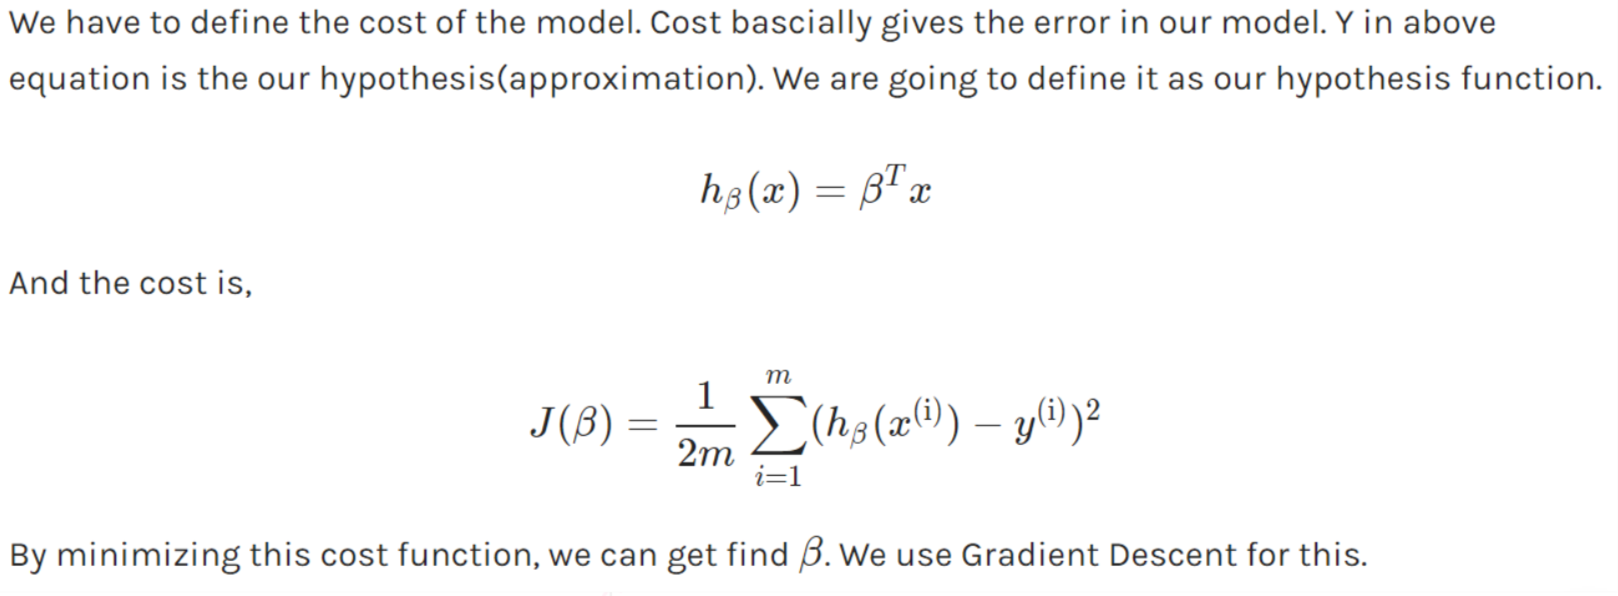

In [ ]:
def cost_func(x,y,b):
  m=len(y)
  j=np.sum((x.dot(b)-y)**2)/(2*m)
  return j

Here,
- x: Feature Matrix
- y: an array of target values
- b: initial value of theta
- alpha: learning rate
- iterations: max no. of iterations for the algorithm

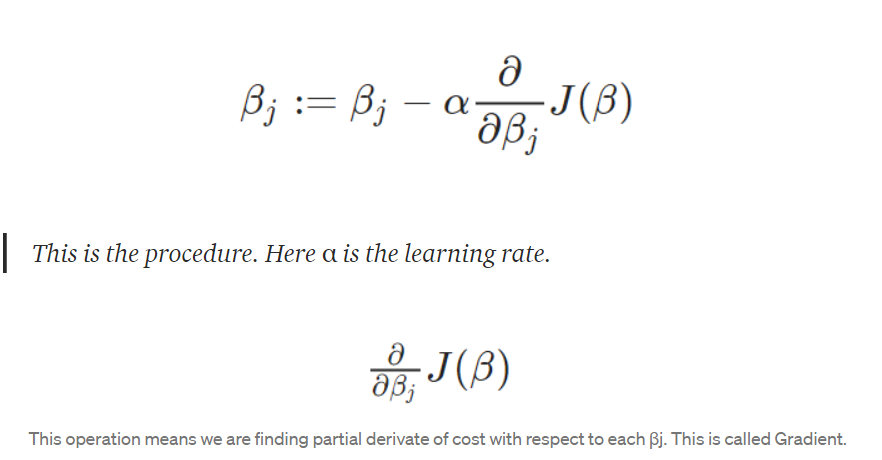

In [ ]:
# defining the gradient descent function
def grad_des(x,y,b,alpha,iterations):
  cost_history= [0]*iterations
  m=len(y)
  for i in range(iterations):
    h=x.dot(b)        # hypothesis values
    loss=h-y          # Difference between Hypothesis and Actual Y
    gradient=x.T.dot(loss)/m     #calculating the gradient
    b=b-alpha*gradient    #changing the values of b using gradient
    cost=cost_func(x,y,b) #new cost value
    cost_history[i]=cost
    return b,cost_history

# Splitting the dataset into Training and Test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# Initializing the coefficients

In [ ]:
b=np.zeros(x_train.shape[1])
alpha=0.005
n_iter=5000
newb,cost_history=grad_des(x_train,y_train,b,alpha,n_iter)

# Test our model

In [ ]:
y_pred=x_test.dot(newb)

In [ ]:
y_pred

array([-0.18434988, -0.01668296, -0.19110299, ..., -0.09598301,
        0.02787044,  0.22368668])

# Defining the root mean square error

In [ ]:
def rmse(y_test,y_pred):
  rmse=np.sqrt(sum((y_test-y_pred)**2)/len(y_test))
  return rmse

In [ ]:
rmse(y_test,y_pred)

454.75622570386463

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)
root_mean=np.sqrt(mean_squared_error(y_test,y_pred))
root_mean

454.7562257038641

In [ ]:
accuracy=(root_mean/np.mean(df.PE))*100
print(accuracy)

100.0861017660714
